In [1]:
import pandas as pd
import sys

sys.path.append("..")

from src.preparator import Preparator
from src.train import Train

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

# Get data

In [4]:
df = pd.read_csv('../data/data.csv', sep=',')
df.head()

,DEFECTIVE,DATE_ORDER,CONTACT_DATE,CONTACT_TYPE_DETAILS,PRODUCT_CATEGORY,BRAND,MODEL,STATE,PRICE,PRICE_NEW,MERCHANT_ID,CUSTOMER_COUNTRY,MERCHANT_COUNTRY,PRODUCT_RELEASE_DATE,has_contact
0,False,2018-03-29,2018-04-04,Gearbox,motorcycle,Harley-Davidson Motor Company,HERITAGE Young,C,50824,106564,1990,South Korea,Luxembourg,2012-09-14,True
1,False,2018-03-29,NaN,NaN,Car,Ford,Mustang gass,C,5391,19651,1270,South Korea,India,2012-08-28,False
2,False,2018-03-29,NaN,NaN,Car,Citroen,Xsara type Yellow Cliff,C,10177,29927,2182,South Korea,China,2014-06-30,False
3,False,2018-03-29,NaN,NaN,Car,Ford,Mustang Green,B,22875,38061,2122,South Korea,Luxembourg,2015-09-17,False
4,True,2018-03-29,2018-04-11,Tire Pressue Irregularities,Car,Ford,Mustang Sport Mega,D,24439,25217,1942,South Korea,Ireland,2016-02-03,True


# Preparator

In [5]:
df_prepared = Preparator(df).compute()
df_prepared.head()

INFO:root:Convert string to datetime format.
INFO:root:Filter data on 30 defective days.
INFO:root:Compute the difference in percent from PRICE_NEW to PRICE.
INFO:root:Filter noisy PRICE signal.
INFO:root:Filter noisy difference in percent from PRICE_NEW to PRICE signal.
INFO:root:Build DAYS_SINCE_PRODUCT_RELEASE_DATE feature.


,DEFECTIVE,DATE_ORDER,CONTACT_DATE,CONTACT_TYPE_DETAILS,PRODUCT_CATEGORY,BRAND,MODEL,STATE,PRICE,PRICE_NEW,MERCHANT_ID,CUSTOMER_COUNTRY,MERCHANT_COUNTRY,PRODUCT_RELEASE_DATE,has_contact,NB_DAYS_PROBLEM_START,PRICE_FROM_NEW_PERC,DAYS_SINCE_PRODUCT_RELEASE_DATE
0,False,2018-03-29,2018-04-04,Gearbox,motorcycle,Harley-Davidson Motor Company,HERITAGE Young,C,50824,106564,1990,South Korea,Luxembourg,2012-09-14,True,6.0,-52.306595,2022
1,False,2018-03-29,NaT,NaN,Car,Ford,Mustang gass,C,5391,19651,1270,South Korea,India,2012-08-28,False,NaN,-72.566282,2039
2,False,2018-03-29,NaT,NaN,Car,Citroen,Xsara type Yellow Cliff,C,10177,29927,2182,South Korea,China,2014-06-30,False,NaN,-65.993919,1368
3,False,2018-03-29,NaT,NaN,Car,Ford,Mustang Green,B,22875,38061,2122,South Korea,Luxembourg,2015-09-17,False,NaN,-39.899109,924
4,True,2018-03-29,2018-04-11,Tire Pressue Irregularities,Car,Ford,Mustang Sport Mega,D,24439,25217,1942,South Korea,Ireland,2016-02-03,True,13.0,-3.085220,785


# Train

In [6]:
trainer = Train(df_prepared)
trainer.compute()

INFO:root:Get X and y.
INFO:root:Split train test.
INFO:root:Generate dummies from categorial columns.
INFO:root:Rebalance binary classification using oversampling.
INFO:root:Train Random Forest model.


In [7]:
trainer.model_evaluation()

,precision,recall,f1-score,support
False,0.946368,0.873494,0.908472,32544.000000
True,0.264427,0.478809,0.340700,3091.000000
accuracy,0.839259,0.839259,0.839259,0.839259
macro avg,0.605398,0.676152,0.624586,35635.000000
weighted avg,0.887216,0.839259,0.859223,35635.000000


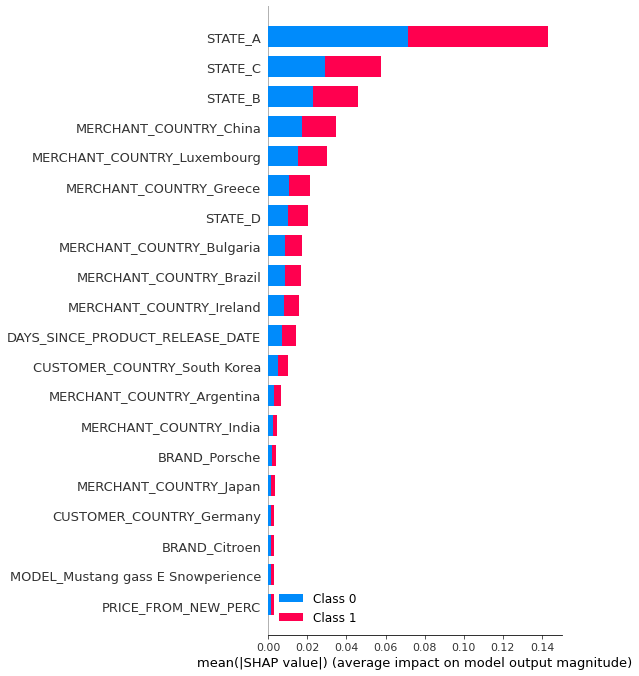

In [8]:
trainer.get_feature_importance()

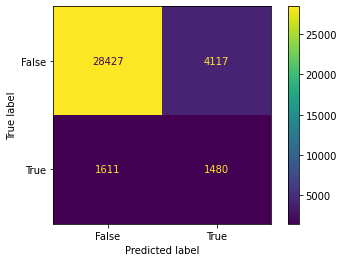

In [9]:
trainer.confusion_matrix();